In [29]:
### Imports
import yt
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline
import seaborn,cmocean,math

from matplotlib.pyplot import figure, show
from matplotlib.image  import NonUniformImage
from matplotlib.ticker import AutoMinorLocator

minorLocator   = AutoMinorLocator(12)

#--------------------------------------------------
#...Allow for using TeX mode in matplotlib Figures
#--------------------------------------------------
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Computer Modern Roman']})
rc('text', usetex=True)
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
    'font.size' : 24,
        'font.family' : 'DejaVu Sans'
        }
plt.rcParams.update(params)
mpl.rcParams['axes.linewidth'] = 2.0
mpl.rcParams['xtick.major.size']=18      # major tick size in points
mpl.rcParams['xtick.minor.size']=9      # minor tick size in points
mpl.rcParams['ytick.major.size']=18      # major tick size in points
mpl.rcParams['ytick.minor.size']=9      # minor tick size in points
mpl.rcParams['xtick.major.width']=0.8      # major tick size in points
mpl.rcParams['xtick.minor.width']=0.6      # minor tick size in points
mpl.rcParams['ytick.major.width']=0.8      # major tick size in points
mpl.rcParams['ytick.minor.width']=0.6
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['font.size'] = 32
mpl.rcParams['legend.fontsize'] = 32
mpl.rcParams['figure.titlesize'] = 32
mpl.rcParams.update({'font.size': 32})

%config InlineBackend.figure_format='retina'

In [33]:
ds = yt.load('/Users/carlfields/15m_3d32km_hdf5_plt_cnt_0696')
data = ds.all_data()
num = 696


yt : [INFO     ] 2020-04-03 16:37:17,488 Parameters: current_time              = 0.3480010047162439
yt : [INFO     ] 2020-04-03 16:37:17,489 Parameters: domain_dimensions         = [96 96 96]
yt : [INFO     ] 2020-04-03 16:37:17,490 Parameters: domain_left_edge          = [-1.5e+09 -1.5e+09 -1.5e+09]
yt : [INFO     ] 2020-04-03 16:37:17,491 Parameters: domain_right_edge         = [1.5e+09 1.5e+09 1.5e+09]
yt : [INFO     ] 2020-04-03 16:37:17,492 Parameters: cosmological_simulation   = 0.0


In [34]:
#ds.derived_field_list

yt : [INFO     ] 2020-04-03 16:37:27,282 xlim = -30000000.000000 30000000.000000
yt : [INFO     ] 2020-04-03 16:37:27,282 ylim = -30000000.000000 30000000.000000
yt : [INFO     ] 2020-04-03 16:37:27,283 xlim = -30000000.000000 30000000.000000
yt : [INFO     ] 2020-04-03 16:37:27,284 ylim = -30000000.000000 30000000.000000
yt : [INFO     ] 2020-04-03 16:37:27,285 Making a fixed resolution buffer of (('flash', 'entr')) 800 by 800
yt : [INFO     ] 2020-04-03 16:37:28,004 Making a fixed resolution buffer of (entr) 4096 by 4096


scale is  120.0 (km) make sure label is correct!!


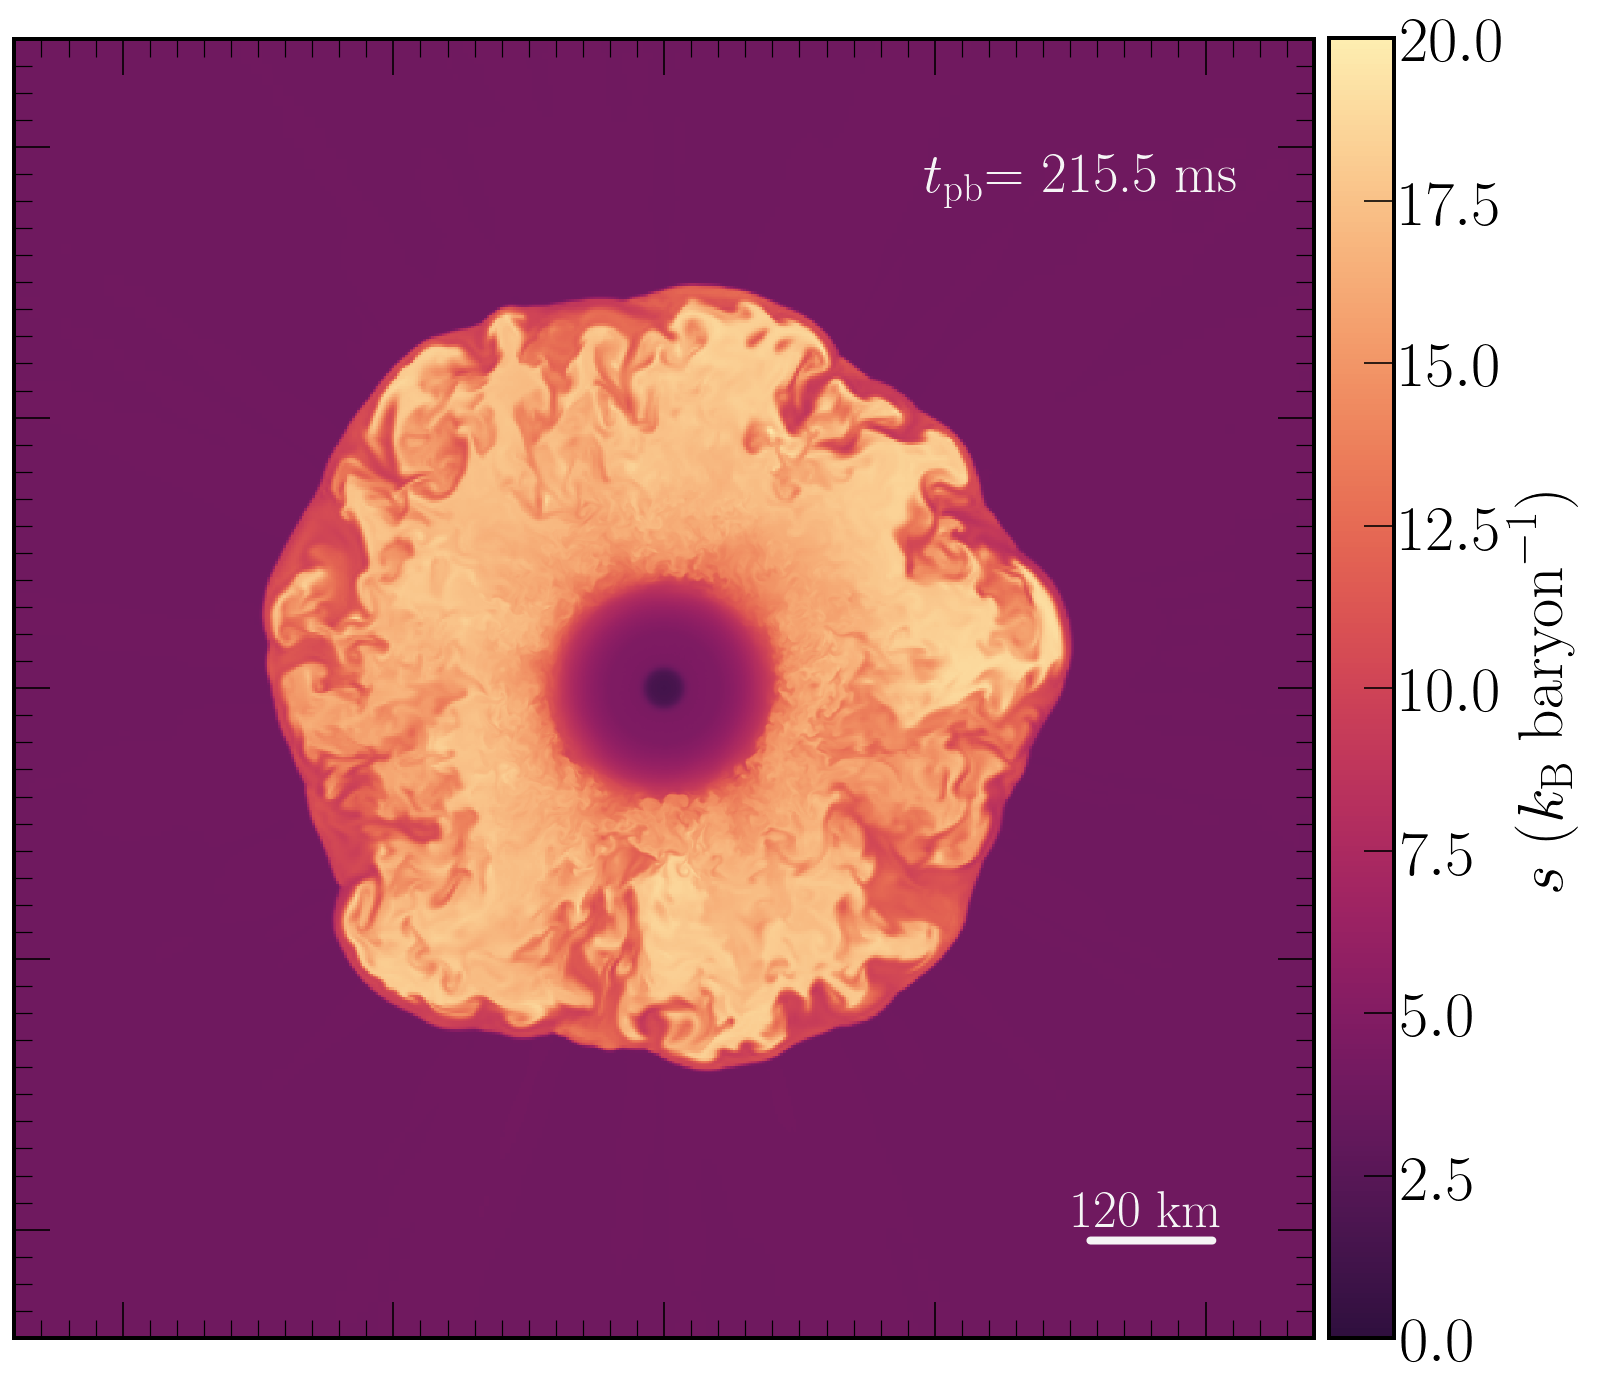

In [35]:
field = "entr"
rmax = 6e7
cmin = 0
cmax = 20
cmap = cmocean.cm.matter_r #'viridis'

# Slice config
slc_origin = 'center'


#z normal
slc_center = yt.YTArray([0,0,0], input_units='cm')
slc_width  = ((rmax, 'cm'),(rmax, 'cm'))

# Make that slice
slc = yt.SlicePlot(ds, 'z', field, center=slc_center, width=slc_width)

#slc.set_unit(field, r'$k_{$')

xctr = 0.0
yctr = 0.0

slc_frb = slc.data_source.to_frb((rmax,"cm"),4096,
    center=(xctr,yctr),height=(rmax,"cm"))


fig=plt.figure(figsize=(12,12),linewidth=5.0)
ax=fig.add_subplot(111)
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))

plt.imshow(slc_frb[field].d,extent=[-rmax,rmax,-rmax,rmax],
    interpolation='nearest',
    aspect=1.0,vmin=cmin,vmax=cmax,
    cmap=cmap,rasterized=True,
    origin='center')

cbar = plt.colorbar(label=r"$s \ (k_{\rm{B}} \ \rm{baryon}^{-1})$",pad=0.01,shrink=0.8175)
cbar.ax.tick_params(length=15,which='both')
cbar.set_clim(cmin,cmax)

bounce = 132.527232848518
bounce_converted = yt.YTArray([bounce], input_units='ms')

t = r'$t_{\rm{pb}}$'

text_string = str(t)+'= {} ms'.format(round(float(ds.current_time.to('ms')-bounce_converted),1))


scale = math.trunc(int(0.85*rmax-0.65*rmax)/1e5)
scale = str(scale)+r'$ \rm{ \ km}$'
plt.text((0.63*rmax),(0.17*rmax-rmax),scale,{'color':'whitesmoke','fontsize':26})


# scale bar
plt.annotate("",
            xy=(0.65*rmax, 0.15*rmax-rmax), xycoords='data',
            xytext=(0.85*rmax, 0.15*rmax-rmax), textcoords='data',
            arrowprops=dict(arrowstyle="-",color='whitesmoke',lw=4))

print('scale is ',(0.85*rmax-0.65*rmax)/1e5,'(km) make sure label is correct!!')

ax.set_xticklabels([])
ax.set_yticklabels([])
#plt.title(r'$\texttt{3D32kmPert}$',color='k',fontsize=32)

#plt.axis('off') # to turn of axes for pretty movies
plt.annotate(text_string,xy=(0.7, 0.875),xycoords='axes fraction',fontsize=28,color='whitesmoke')
plt.xlim(-rmax,rmax)
plt.ylim(-rmax,rmax)
mpl.rcParams.update({'font.size': 32})
plt.tight_layout()
plt.savefig('./3d32kmCCSN_z_normal_slc_{}_{}.pdf'.format(str(num).zfill(4),field),bbox_inches='tight') # for HR movies
plt.show()
#plt.savefig('./{}_{}_slc.pdf'.format(field, str(i).zfill(4)))




